# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [2]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [56]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [47]:
# Write your code here
df.shape
rows= df.shape[0]
col=df.shape[1]
print('rows:', rows, 'col:', col)

rows: 1898 col: 9


#### Observations:
The Data set has 1898 rows and 9 coloums


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [48]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
The Data set has 4 Integers, 1 Float and 4 Object types.
The Rating column looks like of wrong data type which is proababy due to values like 'Not Given' as shown in the few records pulled

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [49]:
# Write your code here
df.isnull().sum()


order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:
The data doesn't seems to have missing values, except the rating column based on head records seems to have 'not given' rating which can be replaced for analysis

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [50]:
# Write your code here
round(df.describe(include='all'),2).T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.0,NaN,NaN,NaN,1477495.5,548.05,1476547.0,1477021.25,1477495.5,1477969.75,1478444.0
customer_id,1898.0,NaN,NaN,NaN,171168.48,113698.14,1311.0,77787.75,128600.0,270525.0,405334.0
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.0,NaN,NaN,NaN,16.5,7.48,4.47,12.08,14.14,22.3,35.41
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1898,4,Not given,736,NaN,NaN,NaN,NaN,NaN,NaN,NaN
food_preparation_time,1898.0,NaN,NaN,NaN,27.37,4.63,20.0,23.0,27.0,31.0,35.0
delivery_time,1898.0,NaN,NaN,NaN,24.16,4.97,15.0,20.0,25.0,28.0,33.0


#### Observations:
The Data set presents total 1898 observations.Average cost of the Order is 16.5 .A customer should receive the order approx 41-42 min on an Average(prepared in 27.37 min and delivered around 24.16 min on an Average).Shake Shake American Cuisine looks to be the top rated Resturent with 219 orders.Around 736 of 1898 enteries are not rated by the customers

### **Question 5:** How many orders are not rated? [1 mark]

In [119]:
# Write the code here
print(df['rating'].value_counts())
rating_5=df['rating'].value_counts()[0]/df.order_id.count()
print(round(rating_5*100) , "% orders belong to rating = 5")


Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64
39 % orders belong to rating = 5


#### Observations:
There are around 736 orders that are not rated


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

Hist and Box plot for All Numeric types
Hist plot for :  cost_of_the_order


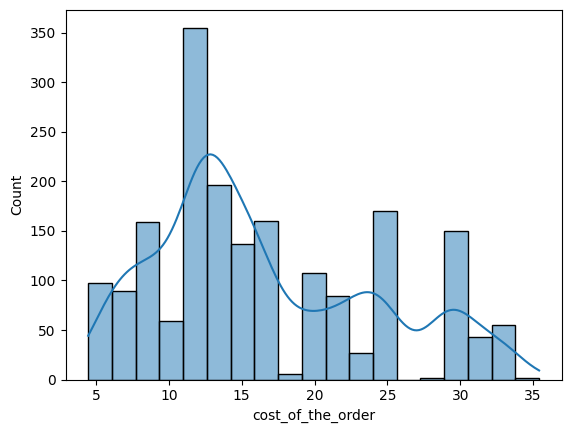

Boxplot for :  cost_of_the_order


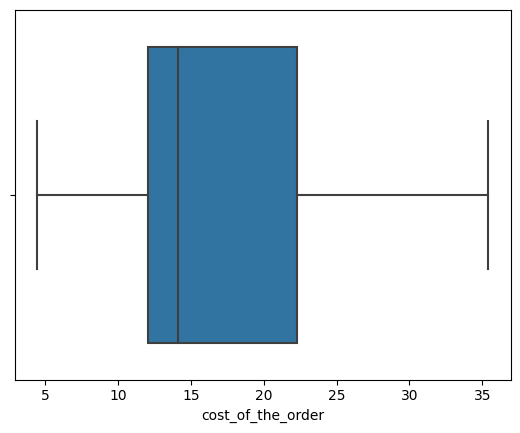

Hist plot for :  food_preparation_time


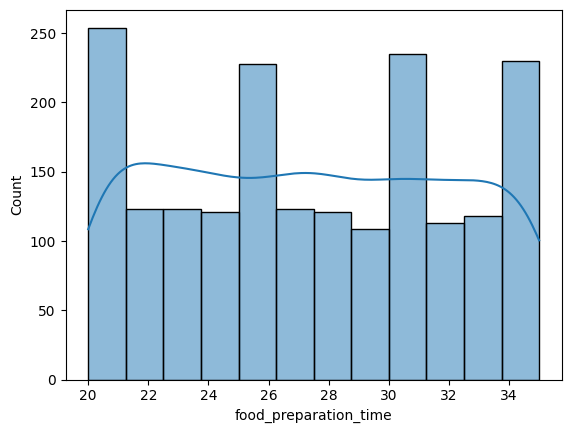

Boxplot for :  food_preparation_time


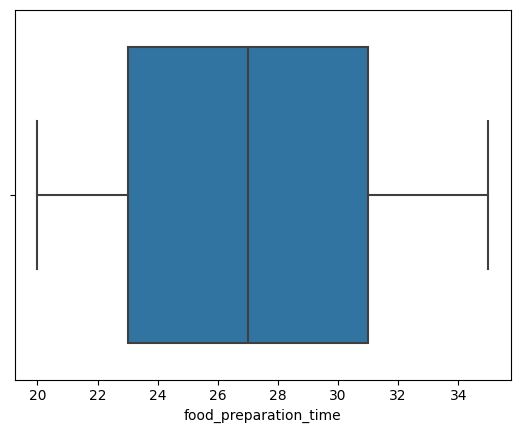

Hist plot for :  delivery_time


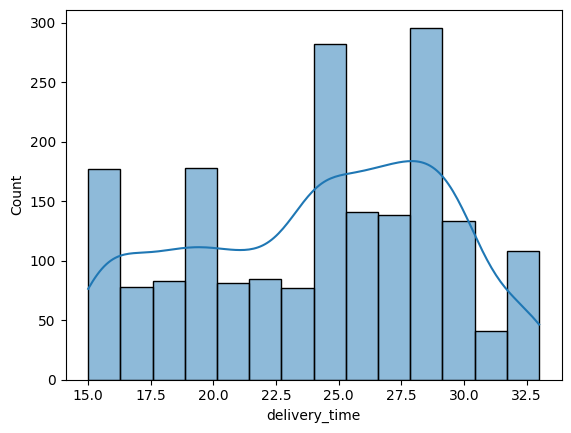

Boxplot for :  delivery_time


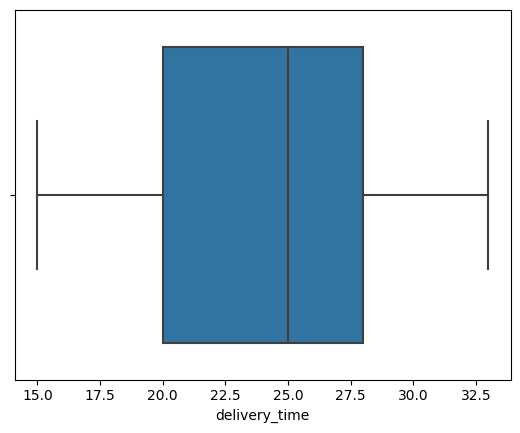

In [43]:
# Write the code here
numeric_rec =['cost_of_the_order','food_preparation_time','delivery_time']
def hist_box_plot_funct(records):
     print('Hist and Box plot for All Numeric types')
     for rec in records:
      print('Hist plot for : ', rec)
      sns.histplot(data=df, x=rec,kde=True)
      plt.show()
      print('Boxplot for : ', rec)
      sns.boxplot(data=df, x=rec)
      plt.show()

hist_box_plot_funct(numeric_rec)

#### Observations cost of the order:
The Histplot looks skewed to the left with peaks at 25 and 30. Per BoxPlot median order looks to be around 14$ and distribution is right skewed. This indicates peaks could be because of 2 diff target customers - Students,Working Profesionals


#### Observations Food Delivery Time:
Per histplot the food sohuld be delivered b/w 15-33 minwith most orders delivered between 25-28 min. Per box plot the median values is 25min and observations are skewed to left


#### Observations Cost of the order:
The Histplot looks skewed to the left with peaks at 25 and 30. Per BoxPlot median order looks to be around 14$ and distribution is right skewed. This indicates peaks could be because of 2 diff target customers - Students,Working Profesionals


### Visualization for Categorical Data Attributes


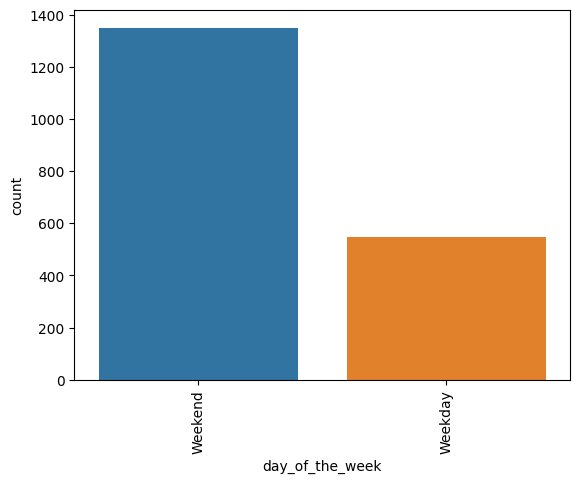

In [17]:
sns.countplot(data=df,x='day_of_the_week')
plt.xticks(rotation=90)
plt.show()

#### Observations Day of the week:
Orders at the Weekend looks higher then the Weekday

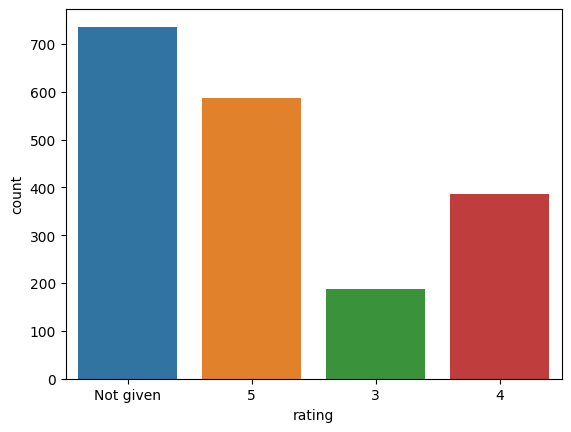

In [20]:
sns.countplot(data=df, x='rating')
# plt.xticks(rotation=90)
plt.show()

<ipython-input-10-4b0c9490c129>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt.rating = dt.rating.astype('int')


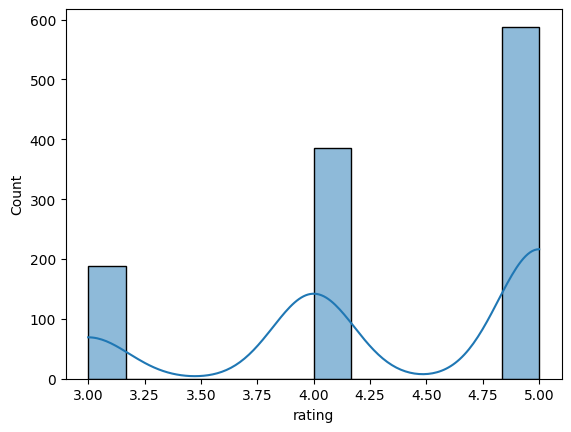

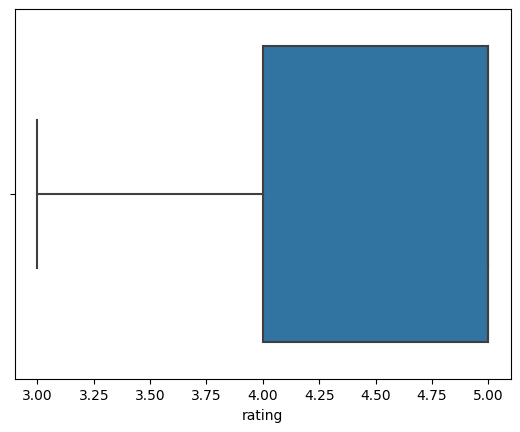

In [10]:
dt =df[df['rating']!= 'Not given']
dt.rating = dt.rating.astype('int')
sns.histplot(data=dt,x='rating',kde=True)
plt.show()
sns.boxplot(data=dt,x='rating')
plt.show()



### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [52]:
# Write the code here
df.groupby(['restaurant_name'])['order_id'].count().sort_values(ascending=False).head(5)

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: order_id, dtype: int64

#### Observations:
The Top 5 restaurants per order received herirarchy :
  * Shake Shack
  * The Meatball Shop
  * Blue Ribbon Sushi
  * Blue Ribbon Fried Chicken
  * Parm

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [34]:
# Write the code here
top_cuisine =df[df['day_of_the_week'] == 'Weekend'].groupby(['cuisine_type'])['order_id'].count().sort_values(ascending=False)
print("Most Popular Cuisine on the Weekend is ",top_cuisine.index[0], "with ", top_cuisine.get(0), "orders")


Most Popular Cuisine on the Weekend is  American with  415 orders


#### Observations:


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [18]:
# Write the code here
order_greater_20 = df.loc[df['cost_of_the_order']> 20]['order_id'].count()/df['order_id'].count()
print(round(order_greater_20*100,2),"percentage of the order cost more then 20 Dollars")

29.24 percentage of the order cost more then 20 Dollars


#### Observations:
29.24 percentage of the order cost more then 20 Dollars

### **Question 10**: What is the mean order delivery time? [1 mark]

In [53]:
# Write the code here
round(df['delivery_time'].mean(),2)

24.16

#### Observations:
Average delivery time for the prepared food is 24.16 min

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [26]:
# Write the code here
df.groupby(['customer_id'])['order_id'].count().sort_values(ascending=False).head(3)

customer_id
52832    13
47440    10
83287     9
Name: order_id, dtype: int64

#### Observations:
Below are the top 3 Customers to recieve 20% discount vouchers:

* customer Id : 52832 with 13 orders
* customer Id : 47440 with 10 orders
* customer Id : 83287 with 9 orders


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


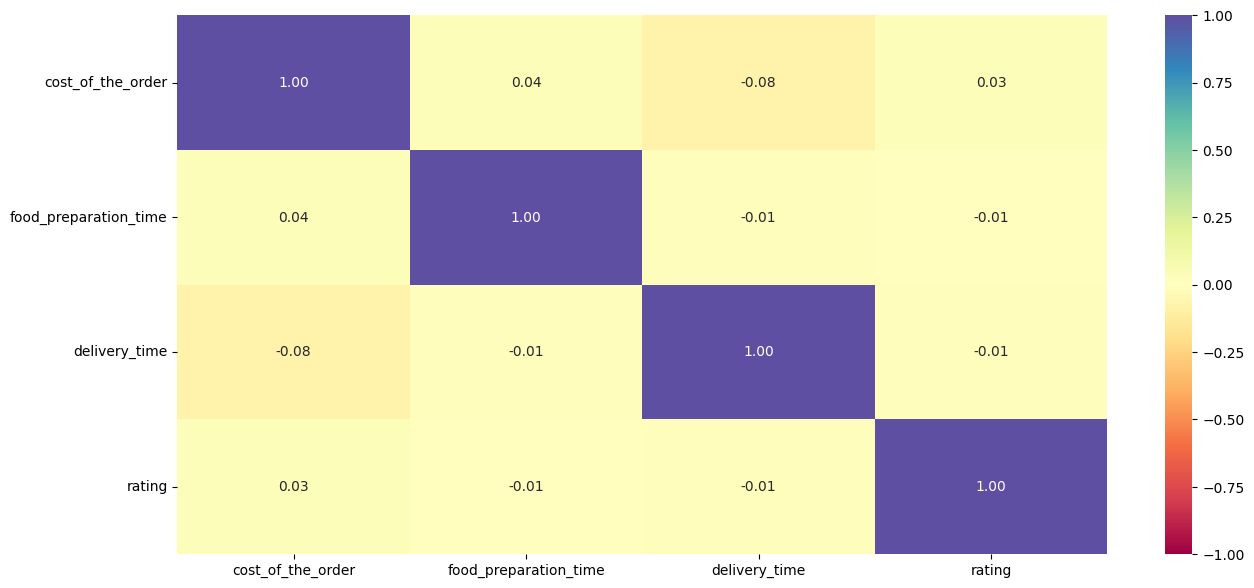

In [82]:
# Check for correlation among numerical variables

corr = dt[numeric_rec].corr()

# plot the heatmap

plt.figure(figsize=(15, 7))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

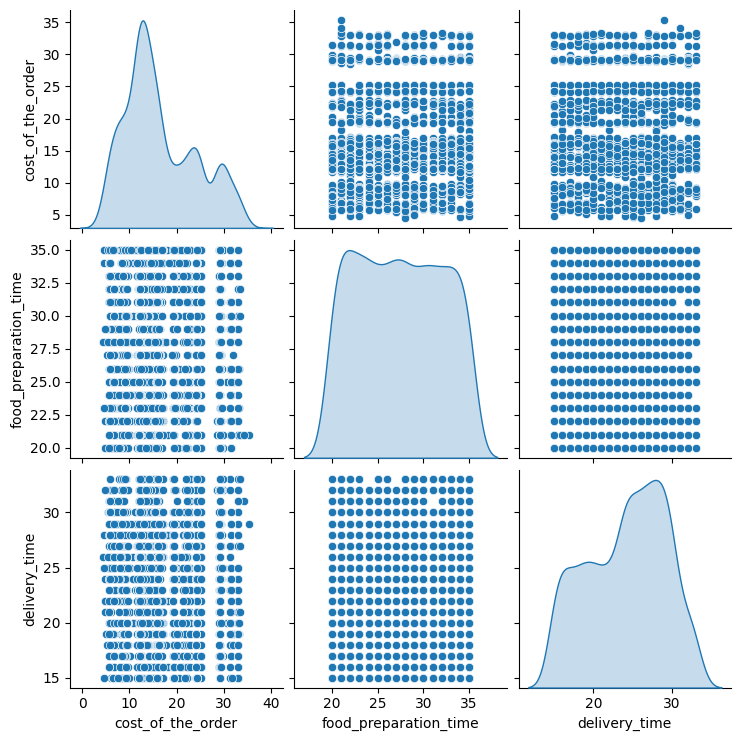

In [83]:
sns.pairplot(data=df[numeric_rec], diag_kind="kde")
plt.show()

#### Observations on the Heatmap and pairplot :
The heatmap and pairplot shows very weak correlation between the variables.

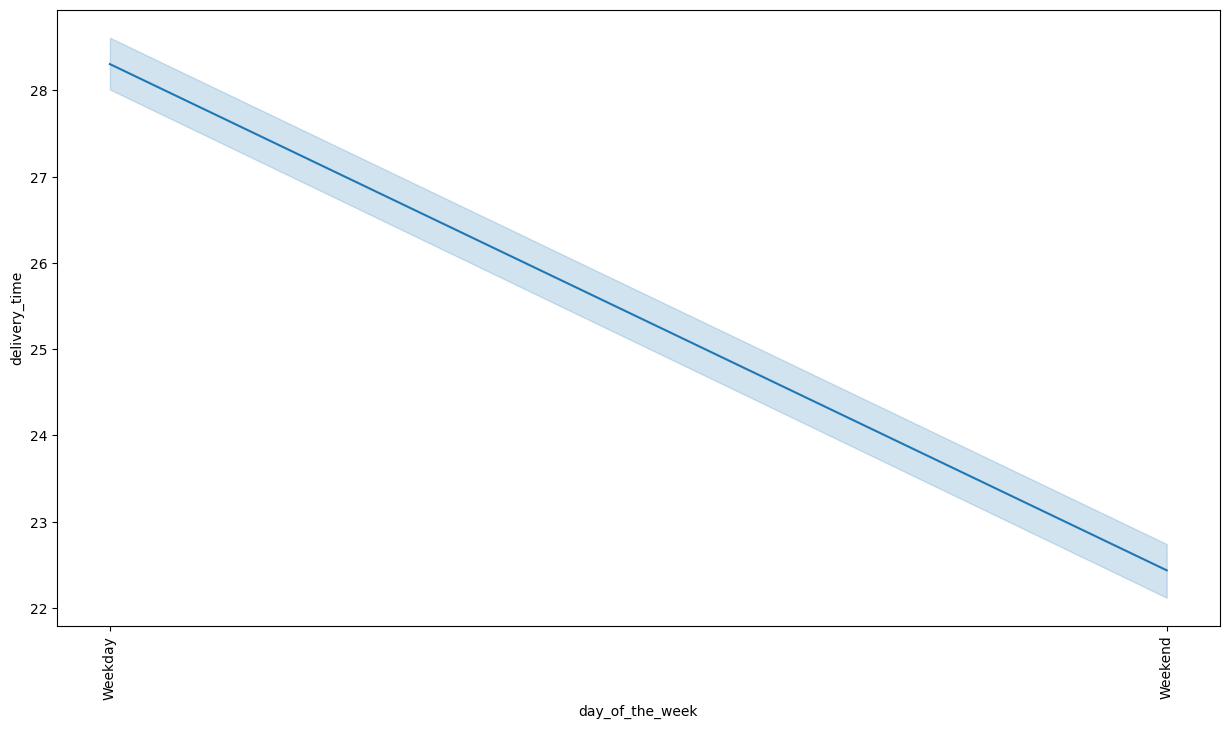

In [ ]:
# Write the code here
plt.figure(figsize=(15,8))
sns.lineplot(data=dt, x='day_of_the_week', y='delivery_time')
plt.xticks(rotation=90);


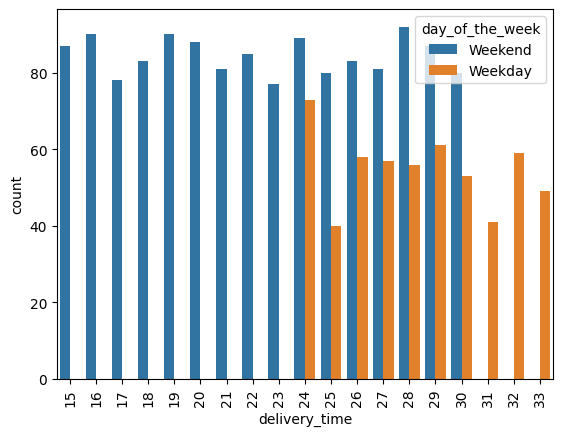

In [77]:
sns.countplot(data=df,x='delivery_time',hue= 'day_of_the_week')
plt.xticks(rotation=90)
plt.show();

#### Observation for Delivery Time over Day
Delivery time seems to take less time on Weekends

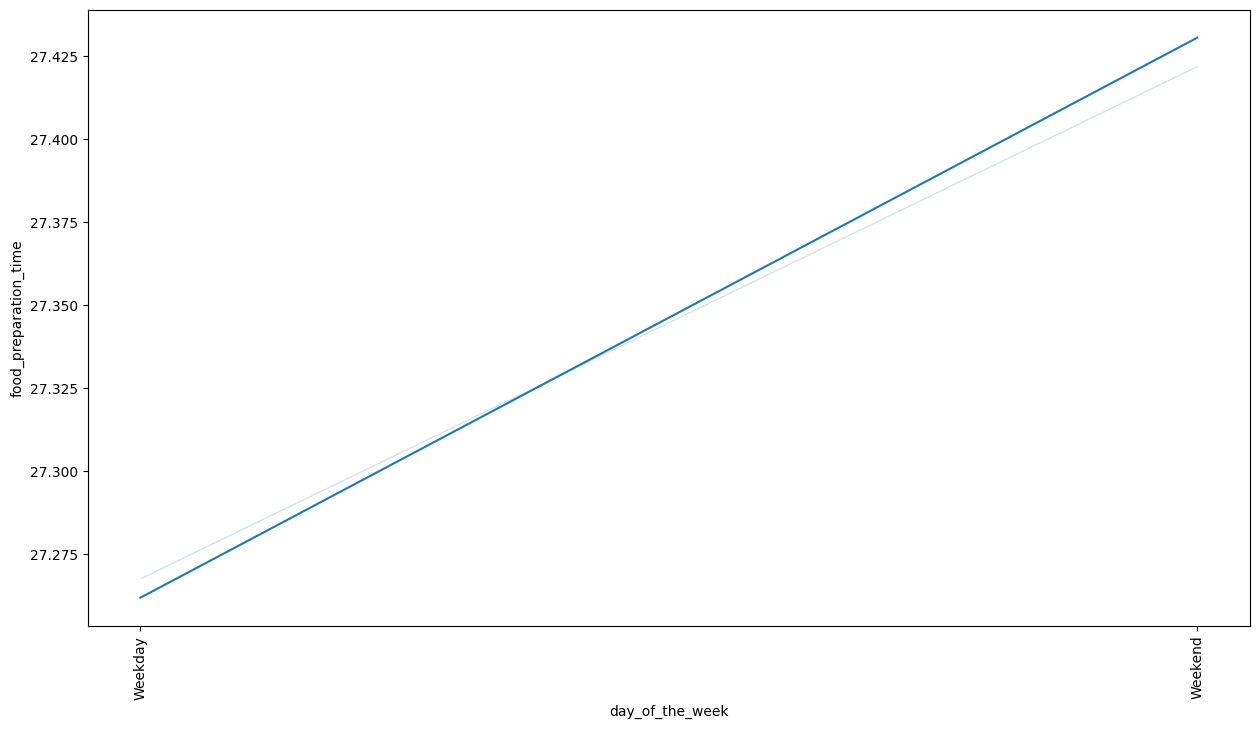

In [81]:
plt.figure(figsize=(15,8))
sns.lineplot(data=dt, x='day_of_the_week', y='food_preparation_time',errorbar=('ci', False))
plt.xticks(rotation=90);

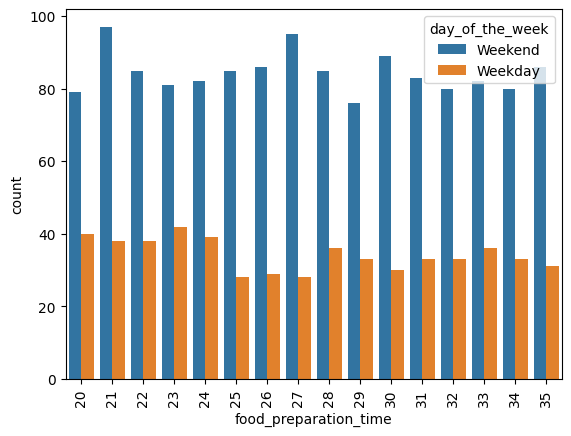

In [78]:
sns.countplot(data=df,x='food_preparation_time',hue= 'day_of_the_week')
plt.xticks(rotation=90)
plt.show();

#### Observation for Food Preparation Time over Day
Food Preparation times seems to take less time on Weekdays

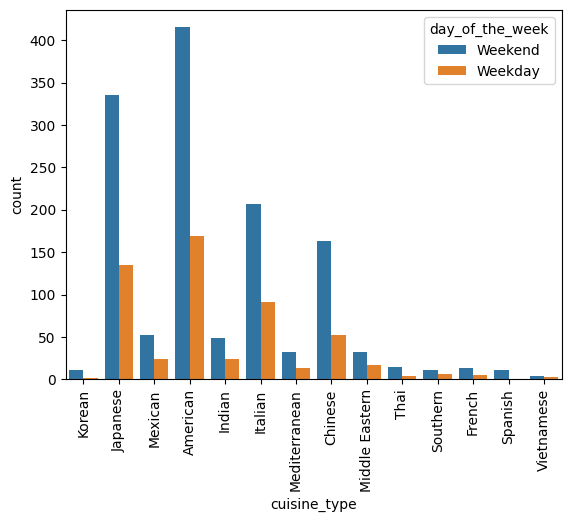

In [74]:
sns.countplot(data=df,x='cuisine_type',hue= 'day_of_the_week')
plt.xticks(rotation=90)
plt.show();

#### Observation on Orders for Cuisine Type for day of the Week
The Demand seems generally low over weekdays.Customers Orders are more favorable to American and Japanese Cusines irrespective of days followed by Italian and Chinese trending over weekend. Vitenamese looks to be less likely ordered any of the days.

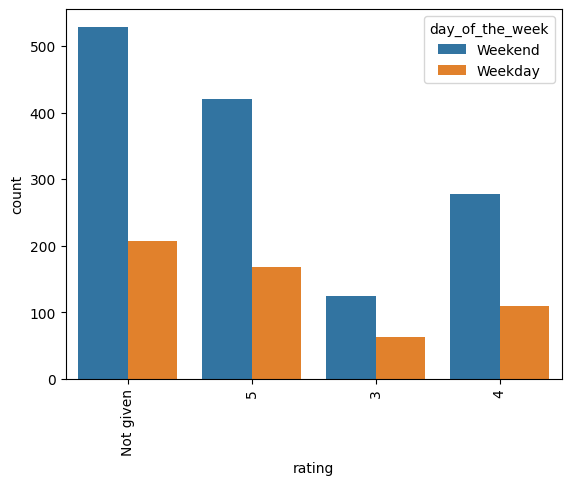

In [75]:
sns.countplot(data=df,x='rating',hue= 'day_of_the_week')
plt.xticks(rotation=90)
plt.show();

### Observation for Rating over day of the week
There are more ratings on Weekends due to more order volumes.Majority of orders are not awarded ratings as observed earlier.

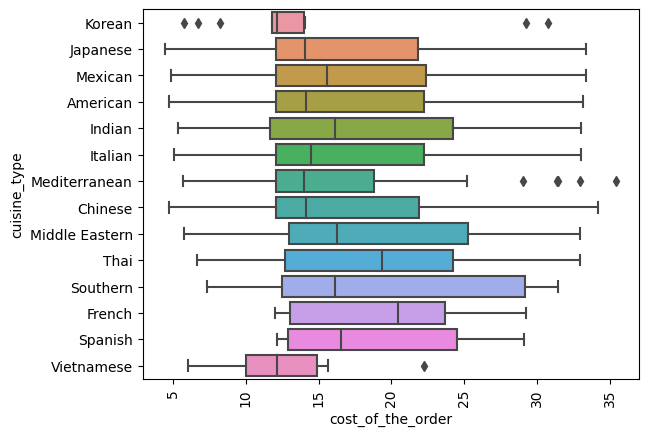

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Korean'),
  Text(1, 0, 'Japanese'),
  Text(2, 0, 'Mexican'),
  Text(3, 0, 'American'),
  Text(4, 0, 'Indian'),
  Text(5, 0, 'Italian'),
  Text(6, 0, 'Mediterranean'),
  Text(7, 0, 'Chinese'),
  Text(8, 0, 'Middle Eastern'),
  Text(9, 0, 'Thai'),
  Text(10, 0, 'Southern'),
  Text(11, 0, 'French'),
  Text(12, 0, 'Spanish'),
  Text(13, 0, 'Vietnamese')])

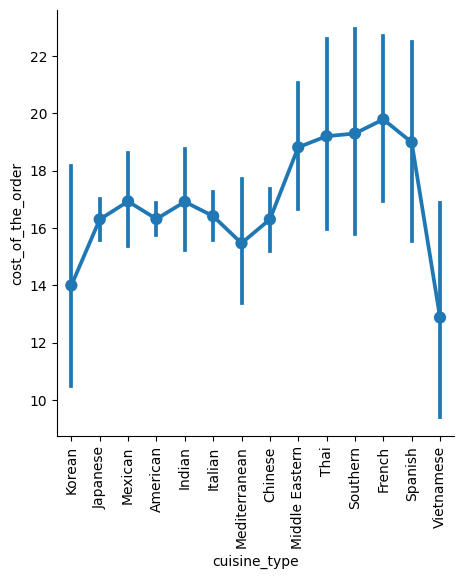

In [89]:
sns.boxplot(data=df,x='cost_of_the_order',y='cuisine_type')
plt.xticks(rotation=90)
plt.show()
sns.catplot(data = df, x = 'cuisine_type',y = 'cost_of_the_order',kind = 'point')
plt.xticks(rotation=90)

#### Observation on Cost of Order over Cuisine Type
The order is fairly skewed accross Cusines with Mediterranean ,Korean and Vietnamese outlier.
The cost of Korean and Vetnamese looks less compared to Thai and Southern.

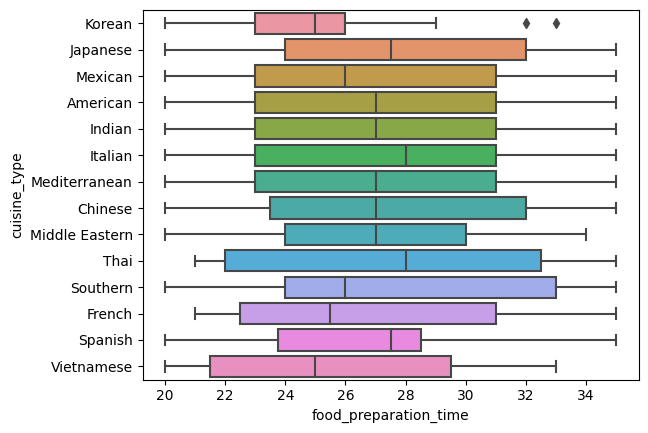

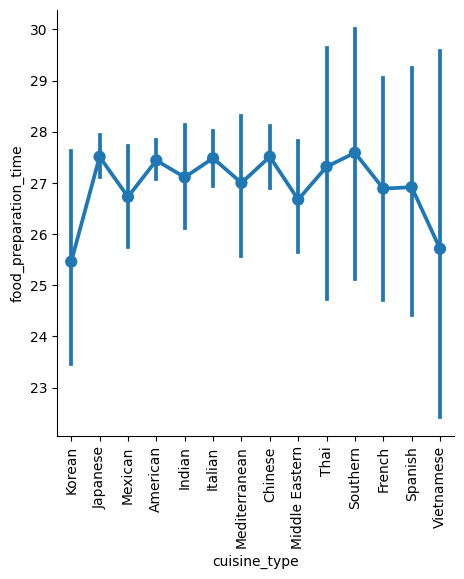

In [87]:
sns.boxplot(data=df,x='food_preparation_time',y='cuisine_type')
plt.show()
sns.catplot(data = df, x = 'cuisine_type',y = 'food_preparation_time',kind = 'point')
plt.xticks(rotation=90)
plt.show();

### Observation on Food Preparation time over Cuisine Type
Most of the orders have similar preparation time with some of them higher confidence level.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [129]:
# Write the code here
df_r =df[df['rating']!= 'Not given'] ## Filter the data set where Rating is not awarded
df_= df_r['rating'].astype('float') ## converting the data type to int from object
df_r_rating_count =df_r.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index() # Calculating the total rating for Resturants
df_r_rating_mean =df_r.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending = False).reset_index() # Calculating the average rating for Resturants

dt1=df_r_rating_count[df_r_rating_count['rating']>50] ## calc total ratings greater then 50
dt2=df_r_rating_mean[df_r_rating_mean['rating']>4] ## Calc Average rating more then 4
dt2[dt2['restaurant_name'].isin(dt1.restaurant_name)] ## restaurants fullfilling the criteria for promotional offer

,restaurant_name,rating
0,Shake Shack,4.177018e+130
1,The Meatball Shop,6.494697e+81
2,Blue Ribbon Sushi,6.089773e+70
3,Blue Ribbon Fried Chicken,5.552274e+61


#### Observations:
Following restaurants meet the criteria for Promotional offers
* The Meatball Shop
* Blue Ribbon Fried Chicken
* Shake Shack
* Blue Ribbon Sushi

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [94]:
# Write the code here
def revenue_calc(rev):
    if rev > 20:
        return rev*0.25
    elif((rev > 5) & (rev < 20)):
        return rev*0.15
    else:
        return rev*0

df['Revenue'] = df['cost_of_the_order'].apply(revenue_calc) ## Write the apprpriate column name to compute the revenue
round(df.Revenue.sum(),2)

6166.3

#### Observations:
Reevenue generated is:  6166.3 across all orders

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [95]:
# Write the code here
df['total_time'] = df['delivery_time'] + df['food_preparation_time']
round(df[df['total_time'] > 60].order_id.count()/df.order_id.count()*100,2)

10.54

#### Observations:
About 10.54% of orders take more than 60 minutes to be prepared and deliver to the Customer.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [101]:
# Write the code here
avg_del_time = df.groupby('day_of_the_week')[['delivery_time']].mean()
print(round(avg_del_time,2))
count_del_time = df.groupby('day_of_the_week')[['delivery_time']].count()
print(round(count_del_time,2))


                 delivery_time
day_of_the_week               
Weekday                  28.34
Weekend                  22.47
                 delivery_time
day_of_the_week               
Weekday                    547
Weekend                   1351


#### Observations:
The Average Delivery time during weekend is 22.47 min against 28.34 min on Weeekdays.
Traffic may also play a factor for lower delivery time on Weekends
There seems to be fewer orders over the weekdays compared to weekends.



### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
* 39% of orders are rated with highest rating of 5 indicating happy customers
* There is a lot of unrated orders which may be a resultant of unsatisfied customers
* Delivery over the weekend is better compared over the weekday.Traffic may be a factor in that
* Food Preparation time looks pretty consistent compared to delivery time
* There are more order on the weekends , indicating high demand
* cost of the order peak around 13 dollars and then around 25 ,30 Dollars. This could be 2 different target customers - Students and Professionals as indicated in problem statement

### Recommendations:

* Improve the Rating data by encouraging customers to rate more often may be with reward schemes, cash back etc. This would greatly help in determining happy customers.
* Weekdays order seems to be less , may be more marketing schemes can help to encourage customers to order over weekdays
* Delivery time looks greater on weekdays , needs more data to understand if that discourages customers to order on weekdays needs to be identified
* Market segment needs to be studies more to understand if different marketing schemes can be introduced with different customer target types - Student and professionals

---